In [1]:
%matplotlib inline
import numpy as np 

from astropy.table import Table

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'stixgeneral'

In [2]:
def find_row(ion_mass_tb, ion): 
    # find the corresponding row in the ion mass table
    ind = np.where(ion_mass_tb['Mass'] == 'M({})'.format(ion))[0][0]
    #ind_eneg = np.where(ion_mass_tb['Mass'] == 'M({})_e-'.format(ion))[0][0]
    #ind_epos = np.where(ion_mass_tb['Mass'] == 'M({})_e+'.format(ion))[0][0]
    return ind #, ind_eneg, ind_epos

In [3]:
ion_eV = {'HI': 13.6, 'CII': 24.38, 'CIV': 64.49, 'SiII': 16.35, 
          'SiIII': 33.49, 'SiIV': 45.14, 'OVI': 138.12}
ions = ['HI', 'SiII', 'SiIII', 'SiIV', 'CII',  'CIV', 'OVI']

In [4]:
ion_mass_tb = Table.read('data/ion_cgm_mass.txt', format='ascii')
ion_mass_tb

Mass,EAGLE_low,EAGLE_mid,EAGLE_high,Bordoloi+2014,Johnson+2017,ModelA,Tchernyshyov22
str8,float64,float64,float64,float64,str6,float64,float64
M(HI),113965.89,1961311.45,48558414.07,nan,nan,56000.0,nan
M(SiII),11.3,2584.07,150981.08,nan,<1.1e4,22.0,nan
M(SiIII),73.46,3760.15,71519.18,nan,2.3e4,310.0,nan
M(SiIV),52.64,1050.04,14636.0,nan,<2.3e4,1300.0,nan
M(CII),76.59,10534.84,502742.66,nan,nan,410.0,nan
M(CIV),1512.71,15126.13,95180.01,150000.0,6.8e4,34000.0,nan
M(OVI),11972.78,63134.47,302610.84,nan,6.8e5,120000.0,480000.0


Plot data 

In [6]:
eagle_mass = {'HI': [113965.89, 1961311.45, 48558414.07], 
              'SiII': [11.3, 2584.07, 150981.08], 
              'SiIII': [73.46, 3760.15, 71519.18], 
              'SiIV': [52.64, 1050.04, 14636.0], 
              'CII': [76.59, 10534.84, 502742.66], 
              'CIV': [1512.71, 15126.13, 95180.01], 
              'OVI': [11972.78, 63134.47, 302610.84]}

b14_mass = {'CIV': 150000.0}

j17_mass = {'SiIII': '2.3e4',
             'CIV': '6.8e4',
             'OVI': '6.8e5',
             'SiIV': '<2.3e4',
             'SiII': '<1.1e4'}

t22_mass = {'OVI': [4.8e5, 2.0e5, -2.0e5]}

modelA_mass = {'HI': 56000.0,
               'CII': 410.0,
               'CIV': 34000.0,
               'SiII': 22.0,
               'SiIII': 310.0,
               'SiIV': 1300.0,
               'OVI': 120000.0}

In [7]:
from load_cgm_dwarf_mod import plt_symbols_standard
import seaborn as sns 
refs, symbols = plt_symbols_standard()
refs = np.asarray(refs)
symbols = np.asarray(symbols)
ss = np.asarray([6, 6, 7, 7, 7, 7, 7])+2 ## for symbol sizes 

inds = refs=='Bordoloi+2014'
b14_sym = symbols[inds][0]
b14_ss = ss[inds][0]+1

inds = refs=='Johnson+2017'
j17_sym = symbols[inds][0]
j17_ss = ss[inds][0]-1

inds = refs=='NewObs/Archived'
this_sym = 'o'
this_ss = ss[inds][0]+2

al = 1
lw = 0.75
linelw = 1.5 # for error bar

cmap = sns.color_palette()
colors = {'eagle': cmap[9], 
          'b14': plt.cm.Greys(0.6), # cmap[9], 
          'j17': plt.cm.Greys(0.6), #cmap[4], 
          'modelA': cmap[3]}

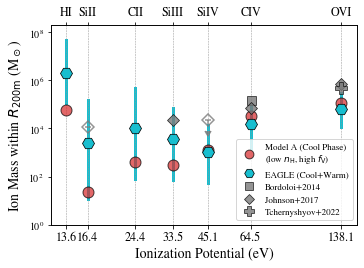

In [8]:
fs = 14

fig = plt.figure(figsize=(5, 3.6))
ax = fig.add_axes([0.13, 0.14, 0.85, 0.77])

# empirical model mass  A
modelA_x = [ion_eV['HI'], ion_eV['SiII'], ion_eV['SiIII'], 
           ion_eV['SiIV'], ion_eV['CII'], ion_eV['CIV'], ion_eV['OVI']]
modelA_y = [modelA_mass['HI'], modelA_mass['SiII'],modelA_mass['SiIII'], 
          modelA_mass['SiIV'], modelA_mass['CII'], modelA_mass['CIV'], modelA_mass['OVI']]
ax.errorbar(modelA_x, modelA_y, fmt='o', alpha=0.7, 
            color=colors['modelA'], markersize=11, lw=1, markeredgecolor='k', 
            markeredgewidth=1, 
            label="Model A (Cool Phase)"
                  "\n"  # Newline: the backslash is interpreted as usual
                  r"(low $n_{\rm H}$, high $f_{\rm V}$)")
            #label=r'Model A\n(low $n_{\rm H}$, high fV, T=10^4K)')

######## eagle mass
for ion in ['HI', 'SiII', 'SiIII', 'SiIV', 'CII', 'CIV', 'OVI']: 
    eagle_x = [ion_eV[ion]] * 3
    eagle_y = eagle_mass[ion] # low, mid, high mass bin values 
    ax.plot(eagle_x, eagle_y, color=colors['eagle'], lw=3)
    if ion == 'HI': 
        label = 'EAGLE (Cool+Warm)'
    else: 
        label = None
    ax.errorbar(eagle_x[1], eagle_y[1], fmt='H', 
                color=colors['eagle'], markersize=12, lw=linelw, 
                 markeredgecolor='k', markeredgewidth=lw, 
                 label=label, capsize=3, capthick=4)

###### Bordoloi+2014
b14_x = [ion_eV['CIV']]# , ion_eV['CIV']]
b14_y = [b14_mass['CIV']]# , b14_mass['CIV_high']]
ax.errorbar(b14_x, b14_y, fmt=b14_sym, alpha=al-0.2, markeredgewidth=lw, 
            color=colors['b14'], markersize=b14_ss, lw=linelw, markeredgecolor='k', label='Bordoloi+2014')

####### Johnson+2017
j17_x = [ion_eV['SiIII'], ion_eV['CIV'], ion_eV['OVI']]
j17_yerr = [np.nan, np.nan, np.nan]
j17_y = [float(j17_mass['SiIII']), float(j17_mass['CIV']), float(j17_mass['OVI'])]
ax.errorbar(j17_x, j17_y, fmt='D', alpha=al-0.2, markeredgewidth=lw, 
            color=colors['j17'], markersize=9, lw=linelw, markeredgecolor='k', label='Johnson+2017', 
            capsize=2)

# upper limit values 
j17_x = [ion_eV['SiII'],ion_eV['SiIV']]
uplims = [True, True]
j17_yerr = [float(j17_mass['SiII'][1:])/1.5, float(j17_mass['SiIV'][1:])/1.5]
j17_y = [float(j17_mass['SiII'][1:]), float(j17_mass['SiIV'][1:])]
ax.errorbar(j17_x, j17_y, fmt='D', alpha=al-0.2, markeredgewidth=1.5, uplims=uplims, yerr=j17_yerr, 
            color=colors['j17'], markersize=9, lw=linelw, markeredgecolor=colors['j17'], label=None, 
            capsize=3, markerfacecolor='none')

## Tchernyshyov's OVI mass
t22_x = np.asarray([ion_eV['OVI']])
t22_y = np.asarray([t22_mass['OVI'][0]])
t22_ylow = np.asarray([t22_mass['OVI'][1]])
t22_yup = np.asarray([t22_mass['OVI'][2]])

ax.errorbar(t22_x, t22_y, # yerr=[t22_ylow, t22_yup], 
            fmt='P', alpha=0.8, color=plt.cm.Greys(0.6), markersize=12, lw=linelw, 
            markeredgecolor='k', markeredgewidth=lw, 
            label='Tchernyshyov+2022', capsize=3, capthick=4)


#### figure legend #### 
ax.set_ylabel(r'Ion Mass within $R_{\rm 200m}$ (M$_\odot$)', fontsize=fs)
ax.set_xlabel(r'Ionization Potential (eV)', fontsize=fs)
    
ion_energy = [ion_eV['HI'], ion_eV['SiII'], ion_eV['CII'], 
              ion_eV['SiIII'], ion_eV['SiIV'], ion_eV['CIV'], ion_eV['OVI']]
for i, ion in enumerate(ion_energy): 
    x = ion_energy[i]
    ax.axvline(x, color=plt.cm.Greys(0.5), ls='--', lw=0.5)
    
legend = ax.legend(loc='lower right', fontsize=fs-5, markerscale=0.8)
#ax.set_ylim(1, 2e6)
ax.set_ylim(1, 2e8)

axb = ax.twiny()
for iax in [ax, axb]: 
    iax.set_yscale('log')
    iax.set_xscale('log')
    iax.set_xlim(12, ion_eV['OVI']+20)
    iax.set_xticks(ion_energy)
    iax.tick_params(axis='x',which='minor',bottom=False, top=False, labelsize=fs-2)
    
axb.set_xticklabels(['HI', 'SiII', 'CII', 'SiIII', 'SiIV', 'CIV', 'OVI'], fontsize=fs-2)
ax.set_xticklabels(['{:.1f}'.format(eV) for eV in ion_energy], fontsize=fs-2)

# fig.tight_layout()
fig.savefig('figs/fig10_ion_mass_comparison_meanlogN.pdf')